# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

# Import libraries & download dataset

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns  
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from sklearn.preprocessing import OrdinalEncoder

from tqdm import tqdm
from typing import Optional

import gensim
import gensim.downloader as gloader  

import re

!pip install python-Levenshtein
import Levenshtein

!pip install pytorch-crf
import torchcrf

import itertools
from functools import partial

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     |████████████████████████████████| 50 kB 2.2 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149863 sha256=e97abec0271f16c108a09c4e4c949cd8c34f0f5e23f8494797e3016217cb2edb
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [1]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip -q dependency_treebank.zip

--2021-12-19 20:33:03--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.03s   

2021-12-19 20:33:03 (12.6 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]



# Dataframe creation and split into train, val and test set

The way to split the dataset is already defined:  
train set : documents 1-100;  
validation set : documents 101-150;  
test set : documents 151-199;

In [42]:
corpus_path = 'dependency_treebank/'
file_list = sorted(os.listdir(corpus_path))

dfs = [pd.read_csv(corpus_path + f, sep='\t', names=['word', 'label', 'foo']).drop('foo', 1)
          for f in file_list]


dataset = pd.concat(dfs, ignore_index=True)
dataset['word'] = dataset['word'].transform(lambda x : x.lower())  

train_set = pd.concat(dfs[:100], ignore_index=True)
train_set['word'] = train_set['word'].transform(lambda x : x.lower())

val_set = pd.concat(dfs[100:150], ignore_index=True)
val_set['word'] = val_set['word'].transform(lambda x : x.lower())

test_set = pd.concat(dfs[150:199], ignore_index=True)
test_set['word'] = test_set['word'].transform(lambda x : x.lower())

labels = dataset['label'].unique()
words = dataset['word'].unique()

In [43]:
encoder = OrdinalEncoder(dtype=np.int64)
encoder.fit(labels.reshape(-1, 1)) 

OrdinalEncoder(dtype=<class 'numpy.int64'>)

In [39]:
EMBEDDING_SIZE = 300
embedder = gloader.load(f'glove-wiki-gigaword-{EMBEDDING_SIZE}')

[==================================================] 100.0% 376.1/376.1MB downloaded


We started splitting documents in sentences using 
punctuation labelled as '.' as end of sentences.

In [44]:
train_stops = train_set[(train_set['label']=='.')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])


OOV_train = set(train_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_val = set(val_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_test = set(test_set['word'].unique()).difference(set(embedder.vocab.keys()))

In [45]:
print('Before pre-processing:')
print("Train set unique words:", len(train_set['word'].unique()))
print('OOV:', len(OOV_train))
print('Max sentence length', max_length)
print("\nValidation set unique words:", len(val_set['word'].unique()))
print('Max sentence length', max_length_val)
print('OOV:', len(OOV_val))
print("\nTest set unique words:", len(test_set['word'].unique()))
print('Max sentence length', max_length_test)
print('OOV:', len(OOV_test))

Before pre-processing:
Train set unique words: 7404
OOV: 359
Max sentence length 250

Validation set unique words: 5420
Max sentence length 80
OOV: 213

Test set unique words: 3407
Max sentence length 80
OOV: 161


Then we tried to improve the sentences splitting using also the semi-column

In [46]:
train_stops = train_set[(train_set['label']=='.') | (train_set['word']==';')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.') | (val_set['word']==';')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.') | (test_set['word']==';')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])

In [47]:
print('After processing')
print('Max sentence length in Train Set:', max_length)
print('Max sentence length in Validation Set:', max_length_val)
print('Max sentence length in Test Set:', max_length_test)

After processing
Max sentence length in Train Set: 67
Max sentence length in Validation Set: 80
Max sentence length in Test Set: 72


In [48]:
def index_of_phrase(stops, word_idx):
  return np.count_nonzero(word_idx > stops)

print("Grouping train set")
train_index_phrase = np.vectorize(partial(index_of_phrase, train_stops))
train_grouped = train_set.groupby(by=train_index_phrase)

print("Grouping val set")
val_index_phrase = np.vectorize(partial(index_of_phrase, val_stops))
val_grouped = val_set.groupby(by=val_index_phrase)

print("Grouping test set")
test_index_phrase = np.vectorize(partial(index_of_phrase, test_stops))
test_grouped = test_set.groupby(by=test_index_phrase)

Grouping train set
Grouping val set
Grouping test set


# OOV processing

In [49]:
OOV = set(words).difference(set(embedder.vocab.keys()))
print(OOV)
print("\nThere are", len(OOV), "OOV")

{'18,444', 'old-house', '434.4', 'identity-management', 'insider-trading', '62.625', 'middle-ground', '43.875', 'yoshihashi', 'red-blooded', 'ednie', 'language-housekeeper', 'three-lawyer', 'airline-related', 'yen-denominated', 'odd-sounding', '12\\/32', 'truth-in-lending', 'co-developers', '18-a-share', '100,980', 'boorse', 'security-type', 'then-speaker', 'light-truck', '497.34', 'shareholder-rights', 'prevalance', 'pension-fund', '142.85', 'coche-dury', '9\\/32', '1928-33', '38.375', '500,004', 'seven-yen', 'lookee-loos', 'samnick', '220.45', 'incentive-bonus', 'securities-based', 'breakey', 'mutual-fund', 'news-american', 're-thought', 'sell-offs', 'biondi-santi', '5.2180', 'northy', 'bald-faced', '1\\/4', '5.276', '129.91', 'cleaner-burning', 'stock-specialist', 'mortgage-based', 'hallwood', '300-day', 'inter-tel', 'wfrr', '142.84', 'interleukin-3', 'bread-and-butter', 'uzi-model', '14\\/32', 'heavy-truck', 'sacramento-based', 'early-retirement', 'buttoned-down', 'arbitrage-relate

In [50]:
def isNumber(n):
  if n == 'nan':
    return False

  try:
    float(n)
    return True
  except:
    return False

vocab_keys = embedder.vocab.keys()
vocab_array = np.array(list(vocab_keys))
str_number_keys = [n for n in vocab_keys if isNumber(n)]
number_keys = np.array(str_number_keys, dtype=np.float32)

def correct_typo(word, threshold=1):
  if word in vocab_keys:
    return word

  if re.match('[a-z]', word): #avoid to use Levenshtein on numbers
    dist = lambda elem: Levenshtein.distance(word, elem)
    distances = np.vectorize(dist)(vocab_array)
    idx_min = np.argmin(distances)
    if distances[idx_min] <= threshold:
      return vocab_array[idx_min]

  #maybe it is a number, convert to the nearest one
  try:
    word = word.replace(',', '')
    number = float(word)

    idx = np.argmin(np.abs(number_keys - number))
    return str_number_keys[idx]

  except:
    pass



def handling_OOV(words, OOV, embedder):
  '''
  Try to check if OOV are due to:
     1)Decimal numbers; 
     2)words separated by special character (-, \\/)compuound words ;
     3)Words compuound by two words present in the vocabulary; 
     4)Typos;
  '''

  '''
  Words separated by special characters are encoded using the embedding of the two words.
  For other words we just check the spelling and try to approximate number.
  '''
  print("Correcting numbers, typos and words separated by special characters.")
  for w in tqdm(OOV):
   try:
    if '-' in w:
      subWords = w.split('-')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords if subW]
      embedder.add([w], [np.mean(embedded_words, axis=0)])
    
    elif '\\/' in w:
      subWords = w.split('\\/')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords]
      embedder.add([w], [np.mean(embedded_words, axis=0)])

    else:
      embedder.add([w], [embedder[correct_typo(w)]])

   except:
    pass

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")
  
  # Compound words
  print('Analyzing compound words')
  for w in tqdm(OOV):
    for i in range(2, len(w)-2):
      w1 = w[:i]
      w2 = w[i:]
      if w1 in vocab_keys and w2 in vocab_keys:
        embedding = (embedder[w1] + embedder[w2]) / 2
        embedder.add([w], [embedding])
        break

  embedder.add(['62%-owned'], [(embedder['.62']+embedder['owned'])/2])

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")

  # Typos
  print('Correcting typos with Levenshtein distance up to 2')
  for w in tqdm(OOV):
   try:
    new_w = correct_typo(w, threshold=2)
    embedder.add([w], [embedder[new_w]])
   except:
    pass

  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("\nThere are", len(OOV), "OOV")
  return

In [51]:
handling_OOV(words, OOV, embedder)

Correcting numbers, typos and words separated by special characters.


100%|██████████| 676/676 [01:25<00:00,  7.92it/s]


There are 76 OOV
Analyzing compound words


100%|██████████| 76/76 [00:04<00:00, 18.05it/s]


There are 17 OOV
Correcting typos with Levenshtein distance up to 2


100%|██████████| 17/17 [00:05<00:00,  3.21it/s]


There are 7 OOV


In [52]:
print('After processing')
print('There are ', len(set(OOV_train).difference(set(embedder.vocab.keys()))), ' OOV in the train set')
print('There are ', len(set(OOV_val).difference(set(embedder.vocab.keys()))), ' OOV in the val set')
print('There are ', len(set(OOV_test).difference(set(embedder.vocab.keys()))), ' OOV in the test set')

After processing
There are  5  OOV in the train set
There are  2  OOV in the val set
There are  0  OOV in the test set


Adding the remaining words randomly.

In [53]:
OOV = set(words).difference(set(embedder.vocab.keys()))
OOV_value = np.random.uniform(low=-0.05, high=0.05, size=(len(OOV), EMBEDDING_SIZE))
embedder.add(list(OOV), OOV_value)

# Dataset analysis

In [54]:
print("The max sentence length in training set is", max_length)
print(f'There are {len(train_stops)} sentences in the training set')
print(f'There are {len(labels)} labels')
print(f'There are {len(words)} unique words, {len(OOV)} of them are OOV')

The max sentence length in training set is 67
There are 2046 sentences in the training set
There are 45 labels
There are 10947 unique words, 7 of them are OOV


## Plot dataset distribution

Train, validation and test set more or less follows the same distribution and they share similar characteristics.  
Validation and test sets can be considered representative.

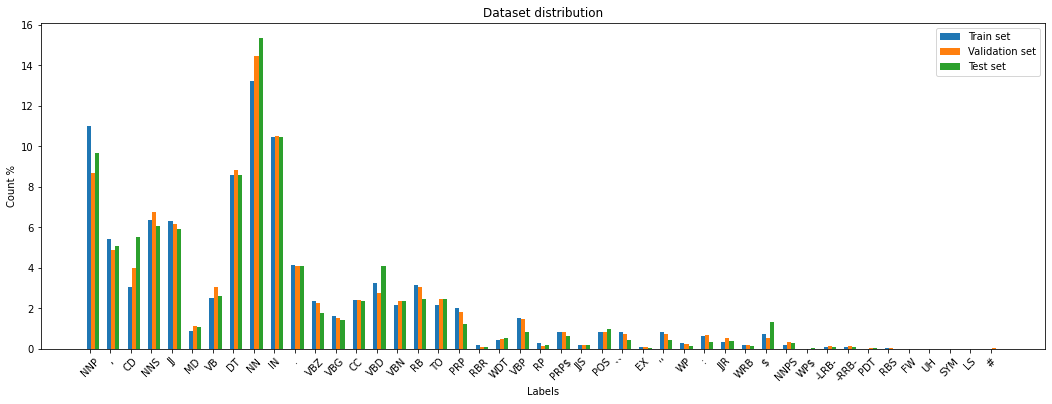

In [55]:
train_counts = train_set.groupby(by='label').count()
train_counts = train_counts / len(train_set) * 100
val_counts = val_set.groupby(by='label').count()
val_counts = val_counts / len(val_set) * 100
val_counts = val_counts.reindex(labels, fill_value=0)
test_counts = test_set.groupby(by='label').count()
test_counts = test_counts / len(test_set) * 100
test_counts = test_counts.reindex(labels, fill_value=0)
ind = np.arange(len(labels))

plt.figure(figsize=(18,6))
width = 0.2       
plt.bar(ind, train_counts.loc[labels, 'word'] , width, label='Train set');
plt.bar(ind + width, val_counts.loc[labels, 'word'], width, label='Validation set');
plt.bar(ind + 2*width, test_counts.loc[labels, 'word'], width, label='Test set');

plt.xlabel('Labels');
plt.ylabel('Count %');
plt.title('Dataset distribution');

plt.xticks(ind + width / 3, labels, rotation=45);
plt.legend();

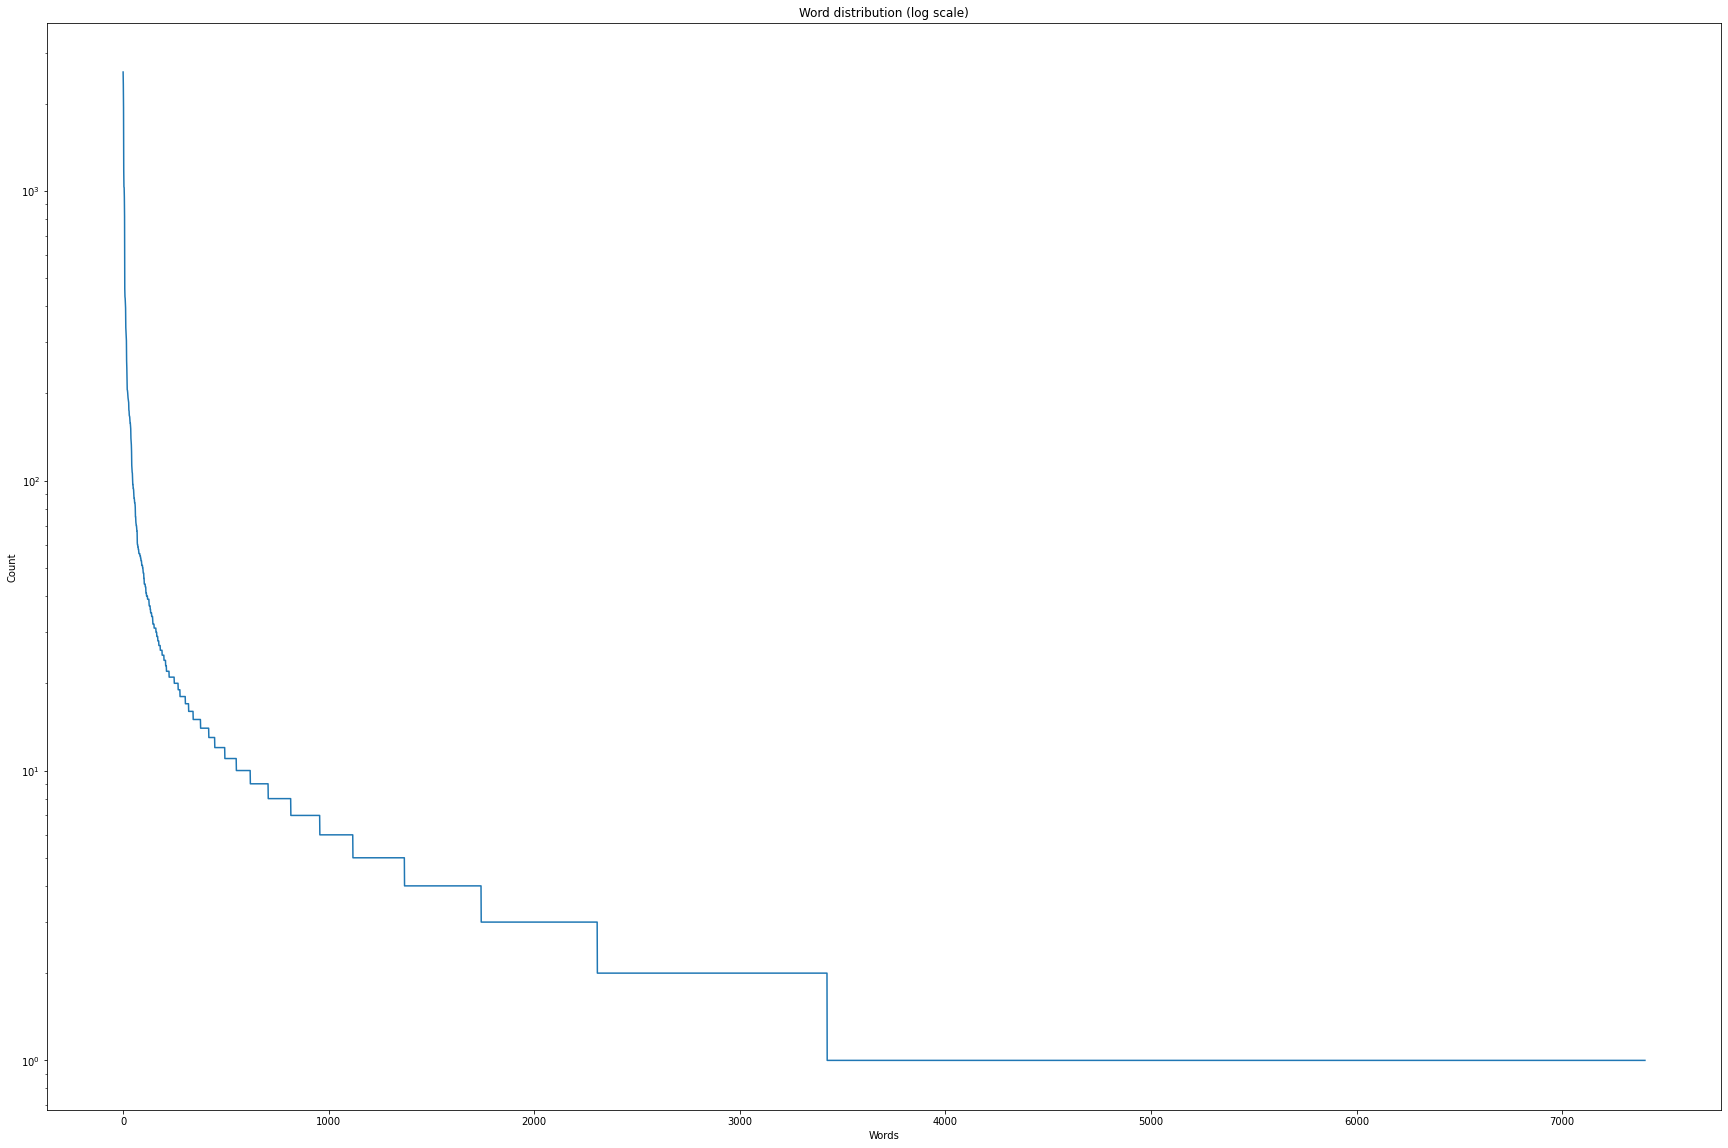

In [56]:
counts_word = train_set.groupby('word').count().to_numpy()[:, 0]

plt.plot(np.sort(counts_word)[::-1]);
plt.yscale('log')

plt.xlabel('Words');
plt.ylabel('Count');
plt.title('Word distribution (log scale)');

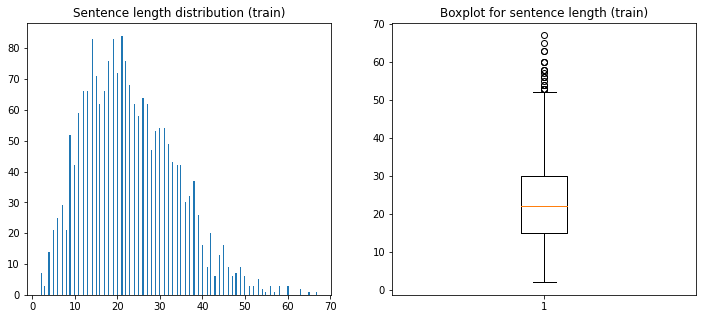

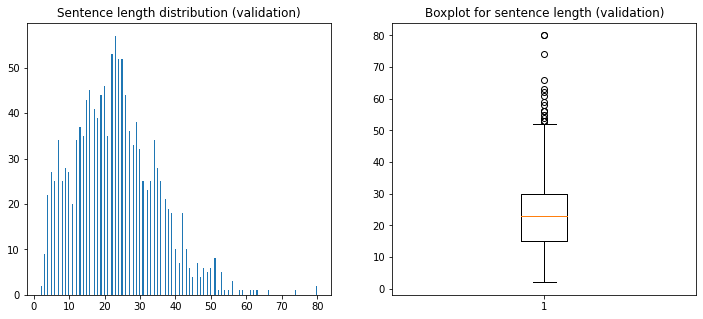

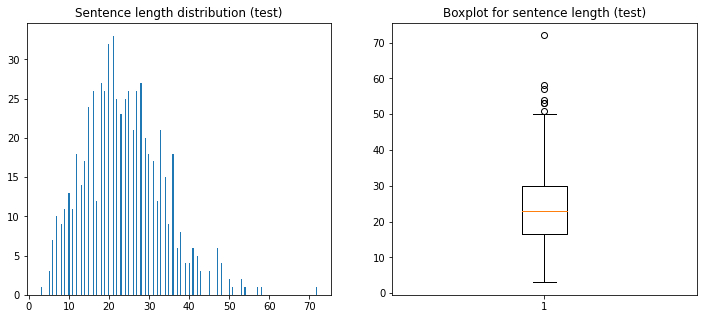

In [57]:
def make_plot(sentences, name):
  f = plt.figure(figsize=(12, 5))
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  ax1.hist(sentences.count()['word'], bins=250);
  ax1.set_title(f"Sentence length distribution ({name})");

  ax2.boxplot(sentences.count()['word']);
  ax2.set_title(f"Boxplot for sentence length ({name})");

name_sentences = {
    'train': train_grouped,
    'validation': val_grouped,
    'test': test_grouped
}

for name in name_sentences:
  make_plot(name_sentences[name], name)

# Create RNN, Optimizer and DataLoader classes


In [58]:
class RNN(nn.Module):
  """
    architecture: str
      'LSTM'   : the baseline architecture
      '2-LSTM' : 2 LSTM layers
      '2-FC'   : 2 Dense Layers
      'GRU'    : Gated Recurrent Unit
  """
  def __init__(self, architecture, input_dim, hidden_size, output_size, dropout, device, CRF=False):
    super(RNN, self).__init__()
    self.architecture = architecture
    self.n_layers = 2 if architecture == '2-LSTM' else 1
    self.dropout_in_rnn = dropout if self.n_layers > 1 else 0
    self.output_size = output_size
    self.hidden_size = hidden_size
    self.device = device
    self.CRF = torchcrf.CRF(output_size, batch_first=True) if CRF else None
    
    if self.architecture == 'GRU':
      self.rnn = nn.GRU(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True, dropout=self.dropout_in_rnn)
    else:
      self.rnn = nn.LSTM(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True, dropout=self.dropout_in_rnn)

    self.dropout_layer = nn.Dropout(p=dropout)

    if self.architecture == '2-FC':
      self.fc = nn.Sequential(
          nn.Linear(self.hidden_size*2, self.hidden_size),
          nn.Dropout(p=dropout),
          nn.Linear(self.hidden_size, output_size)
      )
    else:
      self.fc = nn.Linear(self.hidden_size*2, output_size)

    self.to(device)



  def forward(self, input):
    input = input.permute(1, 0, 2).to(self.device)

    hidden_state = torch.randn(self.n_layers*2, input.shape[1], self.hidden_size).to(self.device)
    if self.architecture == 'GRU':
      hidden = hidden_state
    else:
      cell_state = torch.randn(self.n_layers*2, input.shape[1], self.hidden_size).to(self.device)
      hidden = (hidden_state, cell_state)

    out, hidden = self.rnn(input, hidden)

    out = self.dropout_layer(out)

    #process timesteps independently 
    logits = self.fc(out.view(-1, out.size(2)))

    output = logits.view(input.shape[0], input.shape[1], self.output_size)

    return output.permute(1, 0, 2).contiguous()

  
  def compute_loss(self, input, target):
    target = target.to(self.device)
    pred = self(input)

    if self.CRF:
      target = target.squeeze()
      return -self.CRF(pred, target, mask= target!=-1,  reduction='mean')
    
    else:
      target = target.flatten()
      pred = pred.reshape(-1, pred.shape[-1])
      return nn.CrossEntropyLoss(ignore_index=-1)(pred, target)


  def prediction(self, input):
    self.eval()
    with torch.no_grad():
      scores = self(input)
      
      if self.CRF:
        classes_predicted = torch.Tensor(self.CRF.decode(scores))
      else:
        classes_predicted = torch.argmax(scores, 2)
  
      return classes_predicted.to(self.device)


  def accuracy(self, input: DataLoader):
    num_correct = 0
    num_samples = 0
    self.eval()

    for data in input:
        words = data['words'].to(self.device)
        labels = data['labels'].to(self.device)
        labels = labels.squeeze(-1)
        lengths = data['lengths'].to(self.device)

        classes_predicted = self.prediction(words)

        for i, length in enumerate(lengths):
          num_correct += torch.eq(classes_predicted[i, :length], labels[i, :length]).sum().item()

        num_samples += lengths.sum()
        
    
    return num_correct/num_samples



In [59]:
class Optimization:
    def __init__(self, model, optimizer, train_loader, val_loader):
      self.model = model
      self.optimizer = optimizer
      self.scheduler = ReduceLROnPlateau(optimizer)
      self.train_loader = train_loader
      self.history = []
      self.val_loader = val_loader
      self.val_history = []
    
    def train_epoch(self):
      self.model.train()

      for data in tqdm(self.train_loader):
        loss = self.model.compute_loss(data['words'], data['labels'])
        loss.backward()

        self.optimizer.step()
        self.optimizer.zero_grad()


      self.history.append(loss.item())

      val_loss = self._val_loss()
      self.scheduler.step(val_loss)

      return loss.item()

    def _val_loss(self):
      losses = []
      for data in self.val_loader:
        loss = self.model.compute_loss(data['words'], data['labels'])
        losses.append(loss)
      
      mean = torch.mean(torch.Tensor(losses))
      self.val_history.append(mean.item())

      return mean

In [60]:
class MyDataset(Dataset):
  def __init__(self, dataframe, embedder, encoder, max_length=None):
    self.max_length = max_length if max_length else dataframe.count().max()['word']
    self.dataframe = dataframe
    self.embedder = embedder
    self.encoder = encoder

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    sentence = self.dataframe.get_group(idx)[:self.max_length]

    labels = np.array(sentence['label'], dtype = str).reshape(-1, 1)
    encoded_labels = self.encoder.transform(labels)
    encoded_words = self.embedder[sentence['word']]

    return {'words': encoded_words, 'labels': encoded_labels, 'lengths': len(sentence)}

In [61]:
def collate_fn_pad(batch):
    batch_dict = []
    lengths = torch.Tensor([sample['lengths'] for sample in batch])
    padded_words = pad_sequence([torch.Tensor(sample['words']) for sample in batch], batch_first=True)
    padded_labels = pad_sequence([torch.Tensor(sample['labels']) for sample in batch], batch_first=True, padding_value=-1)

    return {'words': padded_words, 'labels': padded_labels.long(), 'lengths': lengths.int()}


# Training

In [62]:
%load_ext tensorboard
%tensorboard --logdir="logs"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

## Training and tuning functions

In [63]:
def training_loop(model: nn.Module, 
                  train_set: torch.utils.data.DataLoader,
                  val_set: torch.utils.data.DataLoader,
                  patience: int,
                  optimization: Optimization,
                  save_path: str,
                  writer: Optional[SummaryWriter] = None):

  train_acc = []
  val_acc = []
  best_epoch = 0
  epoch = 0

  while epoch - best_epoch <= patience:
    epoch += 1
    print(f'Epoch {epoch}')

    optimization.train_epoch()
      
    print(f'loss:{optimization.history[-1] : .3f}')
    train_acc.append(model.accuracy(train_set))
    print(f'train acc:{train_acc[-1]}')
    val_acc.append(model.accuracy(val_set))
    print(f'val acc:{val_acc[-1]}')
    
    if writer:
      writer.add_scalars('Loss', {"Train": optimization.history[-1]}, epoch)
      writer.add_scalars('Loss', {"Validation": optimization.val_history[-1]}, epoch)
      writer.add_scalars('Train Acc', {"Train": val_acc[-1]}, epoch)
      writer.add_scalars('Val Acc', {"Train": val_acc[-1]}, epoch)
      writer.flush()

    if val_acc[-1] >= val_acc[best_epoch-1]:
      torch.save(model.state_dict(), save_path)
      best_epoch = epoch
      print(f'Model saved at {save_path}')
      
  if writer: writer.close()
  print(f'\n Best model at epoch {best_epoch}')

  return val_acc[best_epoch-1]

In [64]:
def tuning_loop(train_loader: torch.utils.data.DataLoader,
                val_loader: torch.utils.data.DataLoader,
                patience: int,
                search: dict, 
                writer: Optional[SummaryWriter] = None):

  best_model_acc = 0
  config = {}
  for current_values in itertools.product(*tuple(search.values())):
    current_dict = dict(zip(search.keys(), current_values))
    
    architecture = current_dict['architecture']
    CRF = current_dict['CRF']
    hidden_dim = current_dict['hidden_dim']
    dropout = current_dict['dropout']
    lr = current_dict['lr']
    weight_decay = current_dict['weight_decay'] 
    eps = current_dict['eps']

    print('='*15)
    print('New setting with', current_dict)

    model = RNN(architecture, EMBEDDING_SIZE, hidden_dim, len(labels), dropout, device, CRF=CRF)
    optimizer = optim.Adam(model.parameters(), lr=lr, eps=eps, weight_decay=weight_decay)
    optimization = Optimization(model, optimizer, train_loader, val_loader)

    path = f'model-{architecture}-{hidden_dim}-{dropout}-{lr}-{weight_decay}-{eps}.pkl'
    best_acc = training_loop(model, train_loader, val_loader, patience, optimization, path, writer=writer)

    if best_acc > best_model_acc:
      config = current_dict
      best_model_acc = best_acc
      new_path = f'model-{architecture}'
      !\cp $path $new_path

  print(f'\n Best model config : {config} with accuracy {best_model_acc}')

## Start tuning

In [65]:
train_set = MyDataset(train_grouped, embedder, encoder)
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, collate_fn=collate_fn_pad)

validation = MyDataset(val_grouped, embedder, encoder)
val_loader = DataLoader(validation, batch_size=len(validation), collate_fn=collate_fn_pad)

In [66]:
search = {'architecture': ['LSTM', '2-LSTM', '2-FC', 'GRU'],
          'CRF': [True, False],
          'hidden_dim': [128, 256, 512],
          'dropout': [0.4, 0.6, 0.8],
          'lr': [1e-4, 1e-3, 1e-2],
          'weight_decay': [0, 1e-3, 1e-2, 1e-1],
          'eps': [1e-9, 1e-8, 1e-7]
          }


In [67]:
PATIENCE = 10
writer = torch.utils.tensorboard.writer.SummaryWriter(log_dir=os.path.join("logs", "BiLSTM"))

# Uncomment the following line to perform the tuning
# tuning_loop(train_loader, val_loader, PATIENCE, search, writer)

After tuning all the possible combinations of hyperparameters and architectures, the results are pretty similar. Across the architectures, usually, the  best combination of hyperparameters is: 
* hidden_dim = 128
* dropout = 0.6

Adding CRF makes the validation accuracy slightly better (around 0.5% more) but doubles the train time.

2-LSTM and 2-FC perform slightly better, so we decide to train them.

## Train best models

In [68]:
PATIENCE = 15
writer = torch.utils.tensorboard.writer.SummaryWriter(log_dir=os.path.join("logs", "BiLSTM"))

model_lstm = RNN('2-LSTM', EMBEDDING_SIZE, 128, len(labels), 0.6, device, CRF=True)
optimizer = optim.Adam(model_lstm.parameters(), lr=1e-3, eps=1e-8, weight_decay=1e-3)
optimization = Optimization(model_lstm, optimizer, train_loader, val_loader)

path = f'model-2-LSTM-{EMBEDDING_SIZE}.pkl'

# Uncomment the following line to perform the training
best_acc = training_loop(model_lstm, train_loader, val_loader, PATIENCE, optimization, path, writer=writer)

# Load the already trained network
# !wget https://github.com/younik/pos-tagging/raw/main/models/$path
# model_lstm.load_state_dict(torch.load('model-2-LSTM.pkl'))

Epoch 1


100%|██████████| 256/256 [00:22<00:00, 11.59it/s]


loss: 30.342
train acc:0.8045442700386047
val acc:0.7879613637924194
Model saved at model-2-LSTM-300.pkl
Epoch 2


100%|██████████| 256/256 [00:21<00:00, 11.95it/s]


loss: 17.582
train acc:0.8797406554222107
val acc:0.8577108979225159
Model saved at model-2-LSTM-300.pkl
Epoch 3


100%|██████████| 256/256 [00:22<00:00, 11.50it/s]


loss: 13.329
train acc:0.909916341304779
val acc:0.8825962543487549
Model saved at model-2-LSTM-300.pkl
Epoch 4


100%|██████████| 256/256 [00:21<00:00, 12.11it/s]


loss: 7.806
train acc:0.9302517175674438
val acc:0.8980213403701782
Model saved at model-2-LSTM-300.pkl
Epoch 5


100%|██████████| 256/256 [00:20<00:00, 12.35it/s]


loss: 8.633
train acc:0.9445899128913879
val acc:0.9070647358894348
Model saved at model-2-LSTM-300.pkl
Epoch 6


100%|██████████| 256/256 [00:21<00:00, 11.80it/s]


loss: 4.294
train acc:0.952424168586731
val acc:0.9119070768356323
Model saved at model-2-LSTM-300.pkl
Epoch 7


100%|██████████| 256/256 [00:21<00:00, 11.76it/s]


loss: 3.875
train acc:0.9600050449371338
val acc:0.917679488658905
Model saved at model-2-LSTM-300.pkl
Epoch 8


100%|██████████| 256/256 [00:20<00:00, 12.41it/s]


loss: 5.988
train acc:0.9654320478439331
val acc:0.921367347240448
Model saved at model-2-LSTM-300.pkl
Epoch 9


100%|██████████| 256/256 [00:20<00:00, 12.56it/s]


loss: 4.593
train acc:0.9699509739875793
val acc:0.9230991005897522
Model saved at model-2-LSTM-300.pkl
Epoch 10


100%|██████████| 256/256 [00:21<00:00, 11.81it/s]


loss: 4.145
train acc:0.9747022390365601
val acc:0.9250873327255249
Model saved at model-2-LSTM-300.pkl
Epoch 11


100%|██████████| 256/256 [00:21<00:00, 11.87it/s]


loss: 2.392
train acc:0.9777430295944214
val acc:0.9281018376350403
Model saved at model-2-LSTM-300.pkl
Epoch 12


100%|██████████| 256/256 [00:21<00:00, 11.79it/s]


loss: 1.039
train acc:0.9804459810256958
val acc:0.9286149144172668
Model saved at model-2-LSTM-300.pkl
Epoch 13


100%|██████████| 256/256 [00:22<00:00, 11.46it/s]


loss: 4.071
train acc:0.9835289716720581
val acc:0.9299618005752563
Model saved at model-2-LSTM-300.pkl
Epoch 14


100%|██████████| 256/256 [00:21<00:00, 11.64it/s]


loss: 2.594
train acc:0.9836134910583496
val acc:0.9290959239006042
Epoch 15


100%|██████████| 256/256 [00:20<00:00, 12.27it/s]


loss: 2.898
train acc:0.9869287610054016
val acc:0.9292241930961609
Epoch 16


100%|██████████| 256/256 [00:20<00:00, 12.39it/s]


loss: 1.307
train acc:0.986400842666626
val acc:0.9282621741294861
Epoch 17


100%|██████████| 256/256 [00:22<00:00, 11.39it/s]


loss: 3.697
train acc:0.9884491562843323
val acc:0.9311162829399109
Model saved at model-2-LSTM-300.pkl
Epoch 18


100%|██████████| 256/256 [00:21<00:00, 11.73it/s]


loss: 4.737
train acc:0.9896950721740723
val acc:0.9303145408630371
Epoch 19


100%|██████████| 256/256 [00:20<00:00, 12.41it/s]


loss: 3.147
train acc:0.9900329113006592
val acc:0.9305710792541504
Epoch 20


100%|██████████| 256/256 [00:21<00:00, 11.78it/s]


loss: 1.525
train acc:0.9902651906013489
val acc:0.9322386980056763
Model saved at model-2-LSTM-300.pkl
Epoch 21


100%|██████████| 256/256 [00:21<00:00, 11.77it/s]


loss: 1.918
train acc:0.9917011260986328
val acc:0.9334893822669983
Model saved at model-2-LSTM-300.pkl
Epoch 22


100%|██████████| 256/256 [00:20<00:00, 12.19it/s]


loss: 2.404
train acc:0.9924613237380981
val acc:0.9334573149681091
Epoch 23


100%|██████████| 256/256 [00:21<00:00, 12.18it/s]


loss: 2.538
train acc:0.993348240852356
val acc:0.9318858981132507
Epoch 24


100%|██████████| 256/256 [00:21<00:00, 11.74it/s]


loss: 2.114
train acc:0.9929470419883728
val acc:0.9314690232276917
Epoch 25


100%|██████████| 256/256 [00:22<00:00, 11.46it/s]


loss: 1.370
train acc:0.9943196177482605
val acc:0.9332648515701294
Epoch 26


100%|██████████| 256/256 [00:21<00:00, 11.99it/s]


loss: 1.474
train acc:0.9952698349952698
val acc:0.9333611130714417
Epoch 27


100%|██████████| 256/256 [00:20<00:00, 12.19it/s]


loss: 0.724
train acc:0.9954599142074585
val acc:0.9338741898536682
Model saved at model-2-LSTM-300.pkl
Epoch 28


100%|██████████| 256/256 [00:23<00:00, 10.95it/s]


loss: 1.329
train acc:0.9958400130271912
val acc:0.9331045150756836
Epoch 29


100%|██████████| 256/256 [00:23<00:00, 10.80it/s]


loss: 1.793
train acc:0.9959666728973389
val acc:0.9332648515701294
Epoch 30


100%|██████████| 256/256 [00:22<00:00, 11.17it/s]


loss: 1.915
train acc:0.9961567521095276
val acc:0.9340024590492249
Model saved at model-2-LSTM-300.pkl
Epoch 31


100%|██████████| 256/256 [00:22<00:00, 11.20it/s]


loss: 2.598
train acc:0.9961144924163818
val acc:0.93342524766922
Epoch 32


100%|██████████| 256/256 [00:22<00:00, 11.28it/s]


loss: 0.562
train acc:0.9965368509292603
val acc:0.9339703917503357
Epoch 33


100%|██████████| 256/256 [00:23<00:00, 10.80it/s]


loss: 1.128
train acc:0.9964101314544678
val acc:0.9337779879570007
Epoch 34


100%|██████████| 256/256 [00:23<00:00, 10.71it/s]


loss: 1.953
train acc:0.9966846704483032
val acc:0.9340024590492249
Model saved at model-2-LSTM-300.pkl
Epoch 35


100%|██████████| 256/256 [00:23<00:00, 10.85it/s]


loss: 0.981
train acc:0.9968113899230957
val acc:0.9345796704292297
Model saved at model-2-LSTM-300.pkl
Epoch 36


100%|██████████| 256/256 [00:23<00:00, 10.98it/s]


loss: 0.958
train acc:0.9969592094421387
val acc:0.9333931803703308
Epoch 37


100%|██████████| 256/256 [00:23<00:00, 11.10it/s]


loss: 1.061
train acc:0.9968324899673462
val acc:0.9341307282447815
Epoch 38


100%|██████████| 256/256 [00:23<00:00, 10.98it/s]


loss: 2.256
train acc:0.9968535900115967
val acc:0.9337459206581116
Epoch 39


100%|██████████| 256/256 [00:23<00:00, 10.76it/s]


loss: 1.954
train acc:0.9968958497047424
val acc:0.9338741898536682
Epoch 40


100%|██████████| 256/256 [00:23<00:00, 10.96it/s]


loss: 1.695
train acc:0.9967480301856995
val acc:0.9338100552558899
Epoch 41


100%|██████████| 256/256 [00:22<00:00, 11.18it/s]


loss: 0.799
train acc:0.9968958497047424
val acc:0.9345476031303406
Epoch 42


100%|██████████| 256/256 [00:22<00:00, 11.18it/s]


loss: 1.208
train acc:0.996726930141449
val acc:0.9340986609458923
Epoch 43


100%|██████████| 256/256 [00:23<00:00, 10.94it/s]


loss: 1.911
train acc:0.9969803094863892
val acc:0.9339703917503357
Epoch 44


100%|██████████| 256/256 [00:23<00:00, 10.72it/s]


loss: 1.564
train acc:0.9967057704925537
val acc:0.934675931930542
Model saved at model-2-LSTM-300.pkl
Epoch 45


100%|██████████| 256/256 [00:23<00:00, 10.78it/s]


loss: 0.501
train acc:0.9970647692680359
val acc:0.9340665936470032
Epoch 46


100%|██████████| 256/256 [00:23<00:00, 11.06it/s]


loss: 0.600
train acc:0.9970225095748901
val acc:0.9339062571525574
Epoch 47


100%|██████████| 256/256 [00:22<00:00, 11.52it/s]


loss: 2.104
train acc:0.9967902302742004
val acc:0.9340024590492249
Epoch 48


100%|██████████| 256/256 [00:21<00:00, 11.89it/s]


loss: 1.464
train acc:0.9971281290054321
val acc:0.9339383244514465
Epoch 49


100%|██████████| 256/256 [00:21<00:00, 11.79it/s]


loss: 0.870
train acc:0.9970014095306396
val acc:0.9337459206581116
Epoch 50


100%|██████████| 256/256 [00:20<00:00, 12.21it/s]


loss: 2.314
train acc:0.996621310710907
val acc:0.933842122554779
Epoch 51


100%|██████████| 256/256 [00:20<00:00, 12.41it/s]


loss: 1.044
train acc:0.9968958497047424
val acc:0.9343231320381165
Epoch 52


100%|██████████| 256/256 [00:22<00:00, 11.36it/s]


loss: 1.432
train acc:0.9969380497932434
val acc:0.9340665936470032
Epoch 53


100%|██████████| 256/256 [00:21<00:00, 11.85it/s]


loss: 0.887
train acc:0.9968958497047424
val acc:0.933842122554779
Epoch 54


100%|██████████| 256/256 [00:21<00:00, 12.12it/s]


loss: 0.719
train acc:0.9967902302742004
val acc:0.9337459206581116
Epoch 55


100%|██████████| 256/256 [00:21<00:00, 11.91it/s]


loss: 1.557
train acc:0.9969380497932434
val acc:0.9340665936470032
Epoch 56


100%|██████████| 256/256 [00:21<00:00, 11.64it/s]


loss: 0.923
train acc:0.99676913022995
val acc:0.9339062571525574
Epoch 57


100%|██████████| 256/256 [00:21<00:00, 11.99it/s]


loss: 1.300
train acc:0.9970858693122864
val acc:0.9339703917503357
Epoch 58


100%|██████████| 256/256 [00:21<00:00, 12.08it/s]


loss: 2.386
train acc:0.99676913022995
val acc:0.9337459206581116
Epoch 59


100%|██████████| 256/256 [00:21<00:00, 11.86it/s]


loss: 1.101
train acc:0.9969592094421387
val acc:0.9339703917503357
Epoch 60


100%|██████████| 256/256 [00:21<00:00, 11.81it/s]


loss: 1.431
train acc:0.9969380497932434
val acc:0.9337459206581116

 Best model at epoch 44


In [ ]:
model_fc = RNN('2-FC', EMBEDDING_SIZE, 128, len(labels), 0.6, device, CRF=True)
optimizer = optim.Adam(model_fc.parameters(), lr=1e-3, eps=1e-8, weight_decay=1e-3)
optimization = Optimization(model_fc, optimizer, train_loader, val_loader)

path = f'model-2-FC-{EMBEDDING_SIZE}.pkl'

# Uncomment the following line to perform the training
best_acc = training_loop(model_fc, train_loader, val_loader, PATIENCE, optimization, path, writer=writer)

# Load the already trained network
# !wget https://github.com/younik/pos-tagging/raw/main/models/$path
# model_fc.load_state_dict(torch.load('model-2-FC.pkl'))

Epoch 1


100%|██████████| 256/256 [00:18<00:00, 14.00it/s]


loss: 31.842
train acc:0.7450164556503296
val acc:0.7314241528511047
Model saved at model-2-FC-300.pkl
Epoch 2


100%|██████████| 256/256 [00:20<00:00, 12.53it/s]


loss: 29.083
train acc:0.821522057056427
val acc:0.8057594895362854
Model saved at model-2-FC-300.pkl
Epoch 3


100%|██████████| 256/256 [00:18<00:00, 14.05it/s]


loss: 24.930
train acc:0.8605034351348877
val acc:0.8399127125740051
Model saved at model-2-FC-300.pkl
Epoch 4


100%|██████████| 256/256 [00:18<00:00, 14.06it/s]


loss: 21.952
train acc:0.8796350955963135
val acc:0.8589295148849487
Model saved at model-2-FC-300.pkl
Epoch 5


100%|██████████| 256/256 [00:18<00:00, 13.88it/s]


loss: 9.847
train acc:0.8929385542869568
val acc:0.870410144329071
Model saved at model-2-FC-300.pkl
Epoch 6


100%|██████████| 256/256 [00:19<00:00, 13.03it/s]


loss: 16.464
train acc:0.9000337719917297
val acc:0.8781387209892273
Model saved at model-2-FC-300.pkl
Epoch 7


100%|██████████| 256/256 [00:20<00:00, 12.69it/s]


loss: 18.122
train acc:0.9074879288673401
val acc:0.8829810619354248
Model saved at model-2-FC-300.pkl
Epoch 8


100%|██████████| 256/256 [00:20<00:00, 12.60it/s]


loss: 12.357
train acc:0.9155545234680176
val acc:0.8892986178398132
Model saved at model-2-FC-300.pkl
Epoch 9


100%|██████████| 256/256 [00:20<00:00, 12.53it/s]


loss: 10.374
train acc:0.9231142401695251
val acc:0.8960651159286499
Model saved at model-2-FC-300.pkl
Epoch 10


100%|██████████| 256/256 [00:20<00:00, 12.75it/s]


loss: 8.039
train acc:0.9245713353157043
val acc:0.8980213403701782
Model saved at model-2-FC-300.pkl
Epoch 11


100%|██████████| 256/256 [00:20<00:00, 12.72it/s]


loss: 14.665
train acc:0.93080073595047
val acc:0.9025430083274841
Model saved at model-2-FC-300.pkl
Epoch 12


100%|██████████| 256/256 [00:20<00:00, 12.39it/s]


loss: 19.546
train acc:0.9335881471633911
val acc:0.904403030872345
Model saved at model-2-FC-300.pkl
Epoch 13


100%|██████████| 256/256 [00:20<00:00, 12.77it/s]


loss: 8.082
train acc:0.9371779561042786
val acc:0.9068402051925659
Model saved at model-2-FC-300.pkl
Epoch 14


100%|██████████| 256/256 [00:20<00:00, 12.61it/s]


loss: 9.998
train acc:0.9404510259628296
val acc:0.9092453718185425
Model saved at model-2-FC-300.pkl
Epoch 15


100%|██████████| 256/256 [00:20<00:00, 12.57it/s]


loss: 9.117
train acc:0.9437663555145264
val acc:0.9107846617698669
Model saved at model-2-FC-300.pkl
Epoch 16


100%|██████████| 256/256 [00:20<00:00, 12.63it/s]


loss: 10.163
train acc:0.9446743726730347
val acc:0.9115543365478516
Model saved at model-2-FC-300.pkl
Epoch 17


100%|██████████| 256/256 [00:20<00:00, 12.69it/s]


loss: 8.193
train acc:0.946617066860199
val acc:0.9129332900047302
Model saved at model-2-FC-300.pkl
Epoch 18


100%|██████████| 256/256 [00:20<00:00, 12.59it/s]


loss: 11.128
train acc:0.9495311975479126
val acc:0.9137991666793823
Model saved at model-2-FC-300.pkl
Epoch 19


100%|██████████| 256/256 [00:20<00:00, 12.46it/s]


loss: 11.424
train acc:0.9504181146621704
val acc:0.9158194661140442
Model saved at model-2-FC-300.pkl
Epoch 20


100%|██████████| 256/256 [00:19<00:00, 12.83it/s]


loss: 6.316
train acc:0.9518117904663086
val acc:0.9164929389953613
Model saved at model-2-FC-300.pkl
Epoch 21


100%|██████████| 256/256 [00:20<00:00, 12.55it/s]


loss: 9.488
train acc:0.9540079236030579
val acc:0.9163005352020264
Epoch 22


100%|██████████| 256/256 [00:20<00:00, 12.39it/s]


loss: 6.477
train acc:0.9546836614608765
val acc:0.9165570735931396
Model saved at model-2-FC-300.pkl
Epoch 23


100%|██████████| 256/256 [00:20<00:00, 12.38it/s]


loss: 8.354
train acc:0.954556941986084
val acc:0.9176474213600159
Model saved at model-2-FC-300.pkl
Epoch 24


100%|██████████| 256/256 [00:20<00:00, 12.53it/s]


loss: 9.467
train acc:0.9554438591003418
val acc:0.9209504723548889
Model saved at model-2-FC-300.pkl
Epoch 25


100%|██████████| 256/256 [00:20<00:00, 12.48it/s]


loss: 5.802
train acc:0.95808345079422
val acc:0.9215277433395386
Model saved at model-2-FC-300.pkl
Epoch 26


100%|██████████| 256/256 [00:20<00:00, 12.49it/s]


loss: 11.671
train acc:0.9608286023139954
val acc:0.9229387640953064
Model saved at model-2-FC-300.pkl
Epoch 27


100%|██████████| 256/256 [00:20<00:00, 12.66it/s]


loss: 6.414
train acc:0.9611876010894775
val acc:0.9226500988006592
Epoch 28


100%|██████████| 256/256 [00:22<00:00, 11.48it/s]


loss: 9.591
train acc:0.9618844389915466
val acc:0.9228425621986389
Epoch 29


100%|██████████| 256/256 [00:19<00:00, 13.45it/s]


loss: 14.780
train acc:0.9621800780296326
val acc:0.9236121773719788
Model saved at model-2-FC-300.pkl
Epoch 30


100%|██████████| 256/256 [00:18<00:00, 13.96it/s]


# Confusion Matrix and Report


In [70]:
test_dataset = MyDataset(test_grouped, embedder, encoder)
test_loader = DataLoader(test_dataset, batch_size=len(test_set), shuffle=True, collate_fn=collate_fn_pad)

In [71]:
punctuation = np.array([',', '.', '``', "''",  ':', '#', '$' ])
mask = np.array([l not in punctuation for l in labels], dtype=int)
no_punc_labels = labels[mask == 1]

y_true = torch.Tensor()
y_pred_lstm = torch.Tensor().to(device)
y_pred_fc = torch.Tensor().to(device)

for data in test_loader:
  y_true = torch.cat((y_true, data['labels']), 0)
  y_pred_lstm = torch.cat((y_pred_lstm, model_lstm.prediction(data['words'])), 0)
  y_pred_fc = torch.cat((y_pred_fc, model_fc.prediction(data['words'])), 0)

In [72]:
y_true = y_true.squeeze()
mask_padding = y_true != -1
y_true = y_true[mask_padding].flatten().int()
y_pred_lstm = y_pred_lstm[mask_padding].flatten()
y_pred_fc = y_pred_fc[mask_padding].flatten()

encoded_labels = encoder.transform(np.array(labels).reshape(-1, 1)).squeeze()


report_lstm = classification_report(y_true, y_pred_lstm.cpu(), labels=encoded_labels, target_names=labels, output_dict=True, zero_division = 0)
report_fc = classification_report(y_true, y_pred_fc.cpu(), labels=encoded_labels, target_names=labels, output_dict=True, zero_division = 0)

In [73]:
print(model_lstm.accuracy(test_loader))
print(model_fc.accuracy(test_loader))

tensor(0.9397, device='cuda:0')
tensor(0.9397, device='cuda:0')


In [74]:
from prettytable import PrettyTable

for report in [report_lstm, report_fc]:
  class_table = PrettyTable(['Class', 'Precision', 'Recall', 'f1-score', 'support'])

  macro_avg = np.zeros(3)
  weighted_avg = np.zeros(3)
  samples = 0 
  n_classes = 0

  for label in no_punc_labels:
    class_table.add_row([str(label), report[label]['precision'], report[label]['recall'], report[label]['f1-score'], report[label]['support']])
    macro_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']])
    weighted_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']])*int(report[label]['support'])
    
    samples += int(report[label]['support'])
    if report[label]['support'] > 0: n_classes += 1

  print(class_table)

  macro_avg = macro_avg / n_classes
  weighted_avg = weighted_avg / samples

  average_table = PrettyTable(['Average', 'Precision', 'Recall', 'f1-score'])# , 'accuracy'])
  average_table.add_row(['macro avg', macro_avg[0],  macro_avg[1],  macro_avg[2]])# , report['accuracy']])
  average_table.add_row(['weighted avg', weighted_avg[0],  weighted_avg[1],  weighted_avg[2]])#, report['accuracy']])

  print(average_table)

+-------+--------------------+---------------------+---------------------+---------+
| Class |     Precision      |        Recall       |       f1-score      | support |
+-------+--------------------+---------------------+---------------------+---------+
|  NNP  | 0.9104895104895104 |  0.8656914893617021 |  0.8875255623721882 |   1504  |
|   CD  | 0.9883313885647608 |  0.9871794871794872 |  0.9877551020408163 |   858   |
|  NNS  | 0.9123343527013251 |  0.9511158342189161 |  0.931321540062435  |   941   |
|   JJ  | 0.8060165975103735 |  0.8464052287581699 |  0.8257173219978746 |   918   |
|   MD  | 0.9709302325581395 |         1.0         |  0.9852507374631269 |   167   |
|   VB  | 0.9583333333333334 |  0.9702233250620348 |  0.9642416769420469 |   403   |
|   DT  | 0.9902621722846442 |  0.9902621722846442 |  0.9902621722846442 |   1335  |
|   NN  | 0.9013732833957553 |  0.9089383130507763 |   0.90513999164229  |   2383  |
|   IN  | 0.9874529485570891 |  0.9656441717791411 |  0.976426799

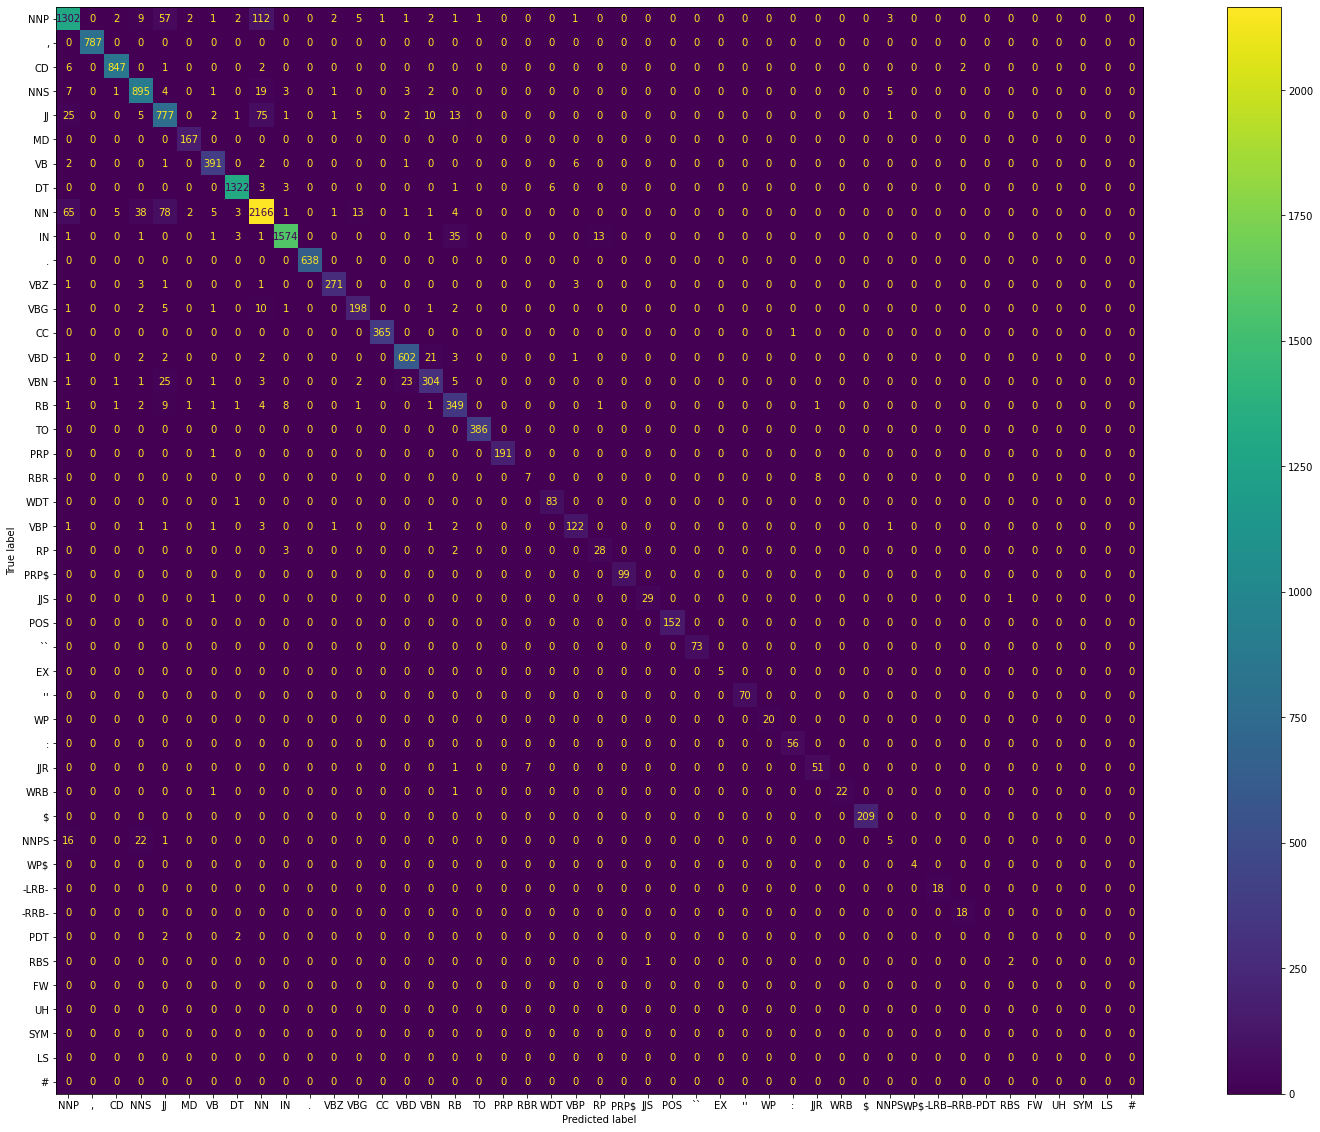

In [75]:
cm = confusion_matrix(y_true, y_pred_lstm.cpu(), labels=encoded_labels)

plt.rcParams["figure.figsize"] = (30, 20)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();